<a href="https://colab.research.google.com/github/FelipeMRizzo/py_projects/blob/master/An%C3%A1lise_de_Dados_Airbnb_(NY).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise dos Dados do Airbnb - *New York*
*by [Felipe Machado Rizzo](https://www.linkedin.com/in/felipe-machado-rizzo-1ba931176/)*

---

Desde 2008 oferecendo à  turistas, viajantes e profissionais em trânsito, o [Airbnb](https://www.airbnb.com.br/) é um serviço que qualquer pessoa ao redor do mundo ofereça suas casas para como hospedagem em um valor muito mais acessível em relação às Redes de Hoteis. Na plataforma pode-se oferecer tanto uma casa inteira como apenas um quarto aos outros usuários, como também alugar um espaço específico caso desejado. Além dos menores custos oferecidos aos clientes o que mais diferencia a plataforma em relação ao mercado é facilidade de uso: alugar um imóvel rapidamente e sem muita burocracia.

Mesmo não sendo uma Rede de Hotéis como Ibis, Mercure ou Blue Tree, a companhia é considerada a maior Empresa Hoteleira da atualidade; presente em mais de 30 mil cidades em 192 países.

"*O Airbnb é a maior plataforma de economia compartilhada no mundo, e as pessoas começaram, mesmo sem ter um feature no site, a anunciar carros, vagas de garagem, barcos e aviões. Então, nós deixamos de ser apenas um site de hospedagem e passamos a ser uma plataforma de economia compartilhada."
[Stefan Schimenes](https://www.linkedin.com/in/stefanschimenes/) | Founder & CEO - InvestReal*


<center><img alt="Analisando Airbnb" width="40%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, serão analisados os dados referentes à cidade New York, retirados por meio do Portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html).**



## Obtenção dos Dados

Os dados usados aqui foram obtidos a partir do site Inside Airbnb.

Para esta análise exploratória, será baixado apenas o seguinte arquivo, que trata especificamente dos dados da cidade de New York, localizada no estado do NY/EUA:

   * `listings.csv` - *Summary information and metrics for listings in New York (good for visualisations).*


In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2020-05-06/visualisations/listings.csv")

## Análise dos Dados

Dentro da base de dados analisada, existem as seguintes variáveis:



**Dicionário das variáveis**

* `id` - Número de ID gerado para identificar o imóvel.
* `name` - Nome da propriedade anunciada.
* `host_id` - Número de ID do proprietário (anfitrião) da propriedade.
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - Esta coluna não contém nenhum valor válido.
* `neighbourhood` - Nome do bairro.
* `latitude` - Coordenada da latitude da propriedade.
* `longitude` - Coordenada da longitude da propriedade.
* `room_type` - Informa o tipo de quarto que é oferecido.
* `price` - Preço para alugar o imóvel.
* `minimum_nights` - Quantidade mínima de noites para reservar.
* `number_of_reviews` - Número de reviews que a propriedade possui.
* `last_review` - Data do último review.
* `reviews_per_month` - Quantidade de reviews por mês.
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião.
* `availability_365` - Número de dias de disponibilidade dentro de 365 dias.

Para análisar os dados importados, antes precisa-se entender qual a estrutura de todos esses dados, para isso analisaremos as 5 primeiras entradas.

In [0]:
# mostrar as 5 primeiras entradas
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2060,Modern NYC,2259,Jenny,Manhattan,Washington Heights,40.85722,-73.93790,Private room,100,1,1,2008-09-22,0.01,1,1
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,3,48,2019-11-04,0.38,2,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,318,2020-04-26,4.66,1,261
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.58,1,0
4,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.38,1,365


### **Variáveis e entradas:**
 Podemos concluir que nossa base de dados tem 50.246 entradas e 16 varíaveis distintas, alternando em tipo inteiro (`int64`), objeto/texto (`object`) e float (`float64`). Não é necessário fazer nenhum ajuste nas varíaveis apresentadas pois todas estão no formato correto para as devidas análises.





In [0]:
# identificar o volume de dados do DataFrame
print(f"Entradas:\t {df.shape[0]}")
print(f"Variáveis:\t {df.shape[1]}")

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 50246
Variáveis:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Valores ausentes no *dataset*:**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. Os dados em questão não está amplamente impactado pela falta de informação; somente variáveis específicas como:

* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em cerca de 22% das entradas;
* As variáveis `name` e `host_name`são nulos em menos de 1% das entradas.

In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.219520
last_review                       0.219520
name                              0.000358
host_name                         0.000219
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Tipo de distribuição das variáveis:**




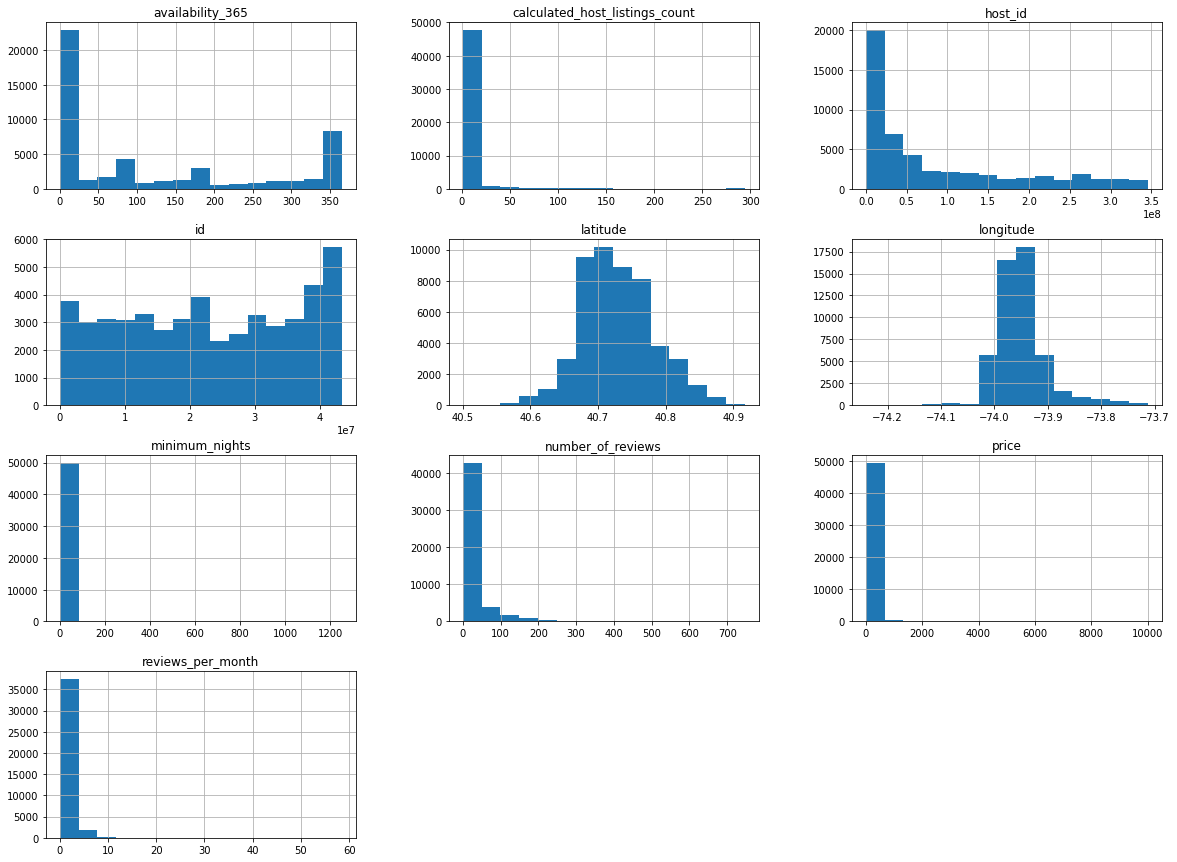

In [0]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(20,15));

### ***Outliers* no *DataFrame*:**

Analisando o histograma, podemos notar que pela distribuição dos dados existem indícios da presença de *outliers* significativos o suficiente para interferir na análise.

As variáveis `price`, `minimum_nights` e `calculated_host_listings_count` são essencias para a análise e estão graficamente distorcidas por conta da presença de *outliers*.


In [0]:
# ver o resumo estatístico das variáveis numéricas
lista = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']

df[lista].describe()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,50246.000000,50246.000000,50246.000000,39216.000000,50246.000000,50246.000000
mean,163.130777,7.912968,24.410978,1.091541,7.046292,121.786530
std,421.687803,21.472286,48.609159,1.425768,28.428846,140.634991
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,68.000000,1.000000,1.000000,0.160000,1.000000,0.000000
50%,104.000000,3.000000,5.000000,0.510000,1.000000,65.000000
75%,175.000000,5.000000,24.000000,1.570000,2.000000,249.000000
max,10000.000000,1250.000000,746.000000,58.430000,294.000000,365.000000


# Resumo Estatístico:

Analisando o Resumo Estatístico (`describe()`) apresentado acima, podemos perceber que:

* A variável `price` possui 75% do valor abaixo de 175, enquanto seu valor máximo atingiu 10.000, o que acaba distorcendo a demonstração gráfica da variável;
* A quantidade mínima de noites (`minimum_nights`) possui 75% dos dados analizados abaixo de 5 noites, enquanto seu valor máximo está em 1250, valor acima até mesmo dos 365/ano;
* O número de imóveis de um mesmo anfitrião encontra-se em no máximo 2 imóveis em até 75% dos casos, enquanto o número máximo apresentado é de 294 imóveis de um mesmo anfitrião, o que acaba nos afastando da realidade se analisarmos somente a média.



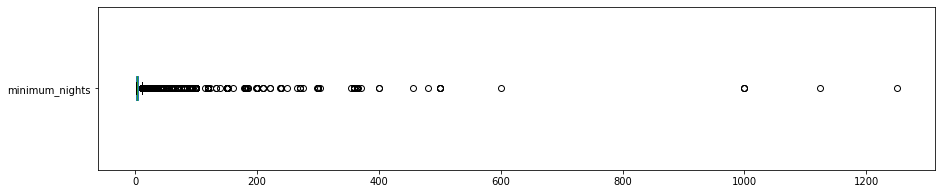

minimum_nights: valores acima de 30:
772 entradas
1.5364%


In [0]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

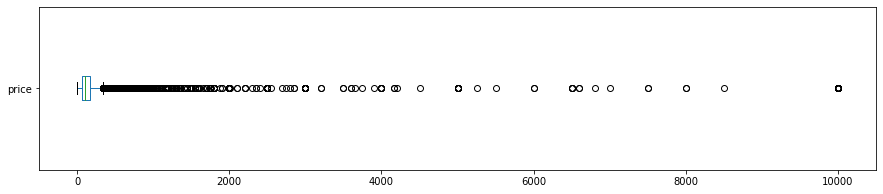


price: valores acima de 500
1139 entradas
2.2668%


In [0]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 500 para price
print("\nprice: valores acima de 500")
print("{} entradas".format(len(df[df.price > 500])))
print("{:.4f}%".format((len(df[df.price > 500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

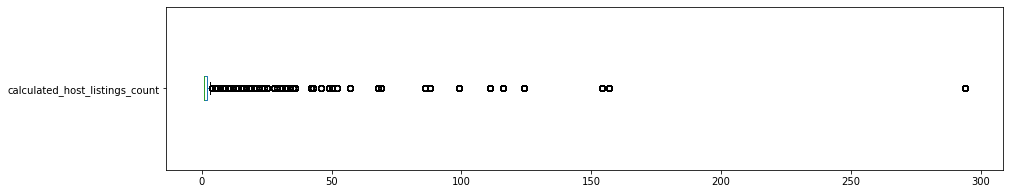

calculated_host_listings_count: valores acima de 30:
2295 entradas
4.5675%


In [0]:
# calculated_host_listings_count
df.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("calculated_host_listings_count: valores acima de 30:")
print("{} entradas".format(len(df[df.calculated_host_listings_count > 30])))
print("{:.4f}%".format((len(df[df.calculated_host_listings_count > 30]) / df.shape[0])*100))

## Histogramas ajustados:

Após identificar e corrigir a presença dos *outliers* nas variáveis principais como `price`, `minimum_nights` e `calculated_host_listings_count`, e feitos também alguns ajustes em outras varíaveis para melhorar a visualização do *DataFrame*, temos:

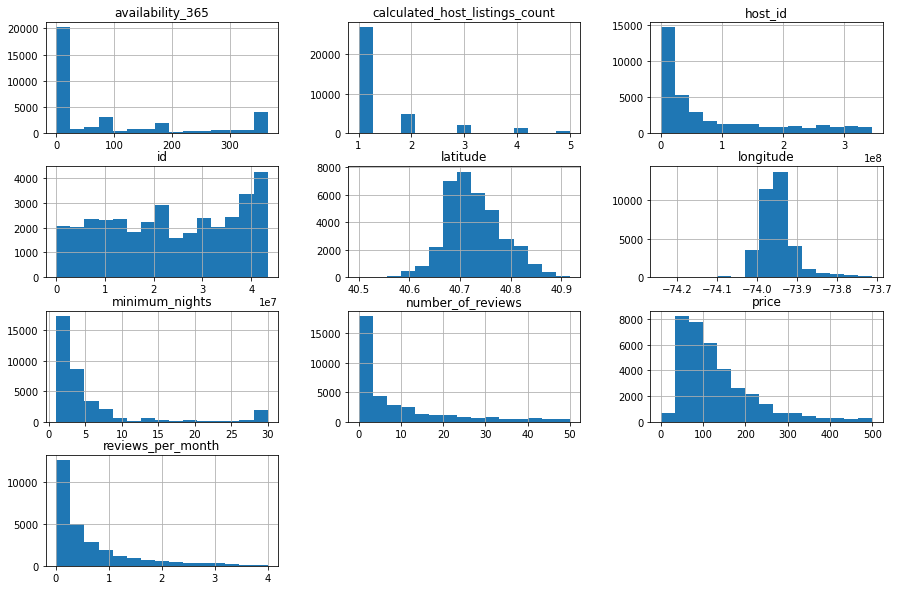

In [0]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 5].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews > 50].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.reviews_per_month > 4].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Correlação existente entre as variáveis:**

Ao análisar a correlação das variáveis, estamos dimensionando o quanto uma informação se relaciona com a outra através do *coeficiente de correlação*.

Para identificar as correlações existentes entre as variáveis de interesse, será:

* Criada uma matriz de correlação;
* Gerada um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`.

In [0]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.014680,0.001194,0.020913,-0.088286,0.070948
minimum_nights,0.014680,1.000000,-0.068378,-0.110269,0.100075,0.175150
number_of_reviews,0.001194,-0.068378,1.000000,0.594254,0.086465,0.191932
reviews_per_month,0.020913,-0.110269,0.594254,1.000000,0.152193,0.259402
calculated_host_listings_count,-0.088286,0.100075,0.086465,0.152193,1.000000,0.290378
availability_365,0.070948,0.175150,0.191932,0.259402,0.290378,1.000000


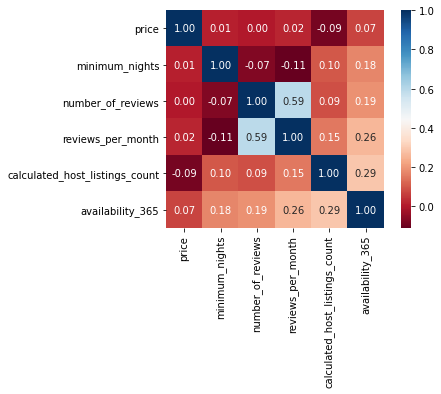

In [0]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Pelo *heatmap* gerado, podemos notar que:
* A maior correlação apresentada (e já esperada) é entre o Número de Reviews (`number_of_reviews`) e o Número de Reviews por Mês (`reviews_per_month`);
* Há uma correlação razoável entre a Número de dias de disponibilidade dentro de 365 dias (`availability_365`) e a Quantidade de imóveis do mesmo anfitrião (`calculated_host_listings_count`), pelo fato de um único anfitrião com um número maior de imóveis poder ter ou não um *range* maior de dias com possibilidade de aluguel, seja em temporada ou fora.

### **Tipo de imóvel mais alugado:**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. A plataforma da opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Contando a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`, tem-se:

In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    18200
Private room       16811
Shared room          684
Hotel room            82
Name: room_type, dtype: int64

In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.508707
Private room       0.469883
Shared room        0.019118
Hotel room         0.002292
Name: room_type, dtype: float64

* Apartamentos/casas inteiras aparecem em 50% das ocorrências de aluguel;
* O aluguel de quartos privativos é a segunda maior ocorência com aproximadamente 47% dos casos.

### **Localidade mais cara de NY:**

Pode-se verificar uma variável em função da outra usando `groupby()`. No caso, será comparado os bairros (`neighbourhoods`) a partir do preço de locação (`price`).


In [0]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Willowbrook       309.000000
Eltingville       300.000000
Spuyten Duyvil    270.500000
Neponsit          249.666667
Tribeca           246.368421
NoHo              241.428571
Holliswood        228.800000
DUMBO             212.416667
Breezy Point      209.333333
Belle Harbor      208.333333
Name: price, dtype: float64

In [0]:
# ver quantidade de imóveis em Willowbrook
print(df_clean[df_clean.neighbourhood == "Willowbrook"].shape)

# ver as entradas em Willowbrook
df_clean[df_clean.neighbourhood == "Willowbrook"]

(1, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
29262,27088022,"Bright, Brand NEW, and Spacious, Gorgeous Home",115827173,David,Willowbrook,40.59886,-74.13217,Entire home/apt,309,4,18,2020-03-12,0.84,2,351


In [0]:
# ver quantidade de imóveis em Tribeca
print(df_clean[df_clean.neighbourhood == "Tribeca"].shape)

# ver as entradas em Tribeca
df_clean[df_clean.neighbourhood == "Tribeca"]

(95, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
146,43726,"Apartment in Tribeca, NYC Panoramic VIEWS~",191091,Ev,Tribeca,40.71915,-74.01017,Entire home/apt,275,3,11,2020-03-14,1.69,1,173
991,471758,TriBeCa Amazing River View Loft 3BR,2339722,Francesca,Tribeca,40.72203,-74.00988,Entire home/apt,500,10,3,2018-06-19,0.05,1,0
1446,741797,Luxury Tribeca 1bdr in Doorman Bldg,3131199,Oly,Tribeca,40.71729,-74.00424,Entire home/apt,259,2,22,2020-01-01,0.24,1,0
2157,1223230,Stunning Sundrenched Tribeca Loft,6672450,Jacqueline,Tribeca,40.71908,-74.00546,Entire home/apt,217,2,41,2019-11-23,0.49,1,0
2636,1782872,Suite Spot in Tribeca,9358396,Anne,Tribeca,40.71481,-74.00934,Entire home/apt,184,4,22,2018-07-19,0.28,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45372,40910329,Cozy 2 BDR at heart of Downtown,61990664,Sonny,Tribeca,40.72223,-74.00996,Entire home/apt,150,2,2,2020-02-29,0.47,1,0
46352,41537464,Tribeca Retreat,70690495,Jeffrey,Tribeca,40.71633,-74.00554,Entire home/apt,103,1,0,NaN,NaN,1,27
48434,42670870,"Private townhouse getaway in Tribeca, COVID19 ...",339944562,Renee,Tribeca,40.71983,-74.00992,Entire home/apt,298,30,0,NaN,NaN,1,358
48547,42722910,Authentic Tribeca loft,362507,Can,Tribeca,40.71903,-74.00894,Entire home/apt,200,2,0,NaN,NaN,1,148


Pode-se observar que os bairros Willowbrook e Eltingville aparecem como os mais caros para se alugar em NY. Mas, ao analisar a quantidade de imóveis dessas regiões, percebeu-se que só haviam um local em cada para se alugar, com os preços de 309 e 300, respectivamente. Não podendo então afirmar que de fato são os bairros mais caros por falta de parâmetro comparativo.

Os dados começam a ficar um pouco melhores para se observar a partir de *Tribeca*, onde-se tem mais que 3 imóveis para comparação, dando uma média de preço de aproximadamente 246/dia.

##### **Gráfico de Região x Preço:**

Fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto relacionando com o preço de cada imóvel. Para isso, considera-se `x=longitude` e `y=latitude`.

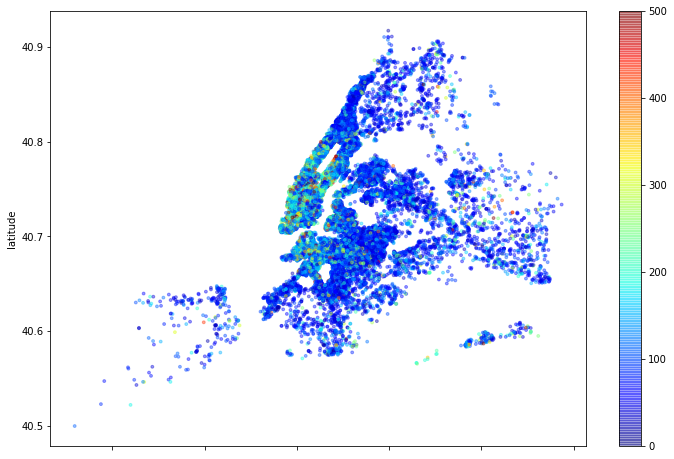

In [0]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões:

Mesmo sendo uma análise simples, pode-se perceber alguns pontos interessantes:
* Há a presença de *outliers* que acabam distorcendo algumas variáveis importantes para a análise do *DataSet*;

* Existe uma correlação entre o Número de dias de disponibilidade dentro de 365 dias e a Quantidade de imóveis do mesmo anfitrião, e isso se justifica pelo fato de um único anfitrião com um número maior de imóveis poder tem a possibilidade ou não de ter um *range* maior de dias para alugar suas casas/apartamentos; 

* Alguns bairros que aparentemente tinham sido considerados como os mais caros da cidade, na verdade não tinham dados o suficiente para fazer-se uma análise de qualidade, pelo fato de não possilitar ter um parâmetro comparativo.

---

*Observação: Este DataSet é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.*
